In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


In [2]:
location_data = pd.read_csv('data\location_data.csv')


In [3]:
people_data = pd.read_csv('data\people_data.csv')

In [4]:
security_data = pd.read_csv('data\security_logs.csv')

In [5]:
timedataframe = pd.DataFrame(security_data.Time.value_counts())

In [6]:
class locations():
    def __init__(self, location, locationname):
        self._location = location 
        self._locationname = locationname
        self.peoplepresent = {}
    
    @property
    def location(self):
        return self._location 
    @property
    def locationname(self):
        return self._locationname

    
    def peopleatlocation(self, time):
        return self._peoplepresent[time]
    
    def peopleaddperson(self, time):
        if time in self.peoplepresent:
            self.peoplepresent[time] += 1
        else:
            self.peoplepresent[time] = 1
            
        
    
    
    

In [7]:
time  = security_data['Time'].str.split('-', expand = True)

In [8]:
newdataframe = pd.concat([security_data, time], axis = 1)

In [9]:
newdataframe = newdataframe.drop('Time', axis = 1)

In [10]:
newdataframe = newdataframe.rename(columns = {0: 'Start', 1: 'End'})

In [ ]:
#list of people in the room if someone enters or leaves, create a key of the people iroomn the . 
# map users 

In [11]:
newdataframe

,Student ID,Name,Location,Start,End
0,2495155L,Mohamed Lloyd,Kelvingrove Park,0338,0716
1,2470551P,Melanie Patterson,Kelvingrove Park,0301,0533
2,2546112P,Eric Parkin,Kelvingrove Park,0720,0843
3,2453876J,Scott Johnston,Kelvingrove Park,0755,0737
4,2549181S,Margaret Saunders,Queen Margaret Union,0843,1052
...,...,...,...,...,...
657,2477517J,Gerald Jones,Library,2114,0017
658,2691086J,Callum Jenkins,The Hive,2328,0113
659,2533061J,Antony James,Kelvingrove Park,2353,0340
660,2858027D,Lynda Davis,Library,2351,0115


In [12]:
from datetime import datetime, time, date 
def convert_to_datetime(time):
    time = time.strip()
    time_hour = int(time[0:2])
    time_minutes = int(time[2:4])
    return datetime(2020, 10, 10, time_hour, time_minutes)

In [13]:
newdataframe['Start'] = newdataframe['Start'].apply(convert_to_datetime)
newdataframe['End'] = newdataframe['End'].apply(convert_to_datetime)
newdataframe = newdataframe.sort_values(by=['Start'])

In [14]:
amy = list((newdataframe[newdataframe['Name']== 'Angela Jones']).Location)
amy

['Main Building',
 'Kelvingrove Park',
 'Queen Margaret Union',
 'Boyd Orr Building',
 'Glasgow University Union']

In [15]:
susnames = ['Beth Jones', 'Oscar Brown', 'Shaun Yates', 'Abdul Murphy']

In [16]:
#write a function that checks to make sure they are not in the same place at the same time 

In [17]:
names = list(newdataframe.Name.unique())

In [18]:
abdul = newdataframe[newdataframe['Name']== 'Abdul Murphy']

In [19]:
abdul

,Student ID,Name,Location,Start,End
36,2786843M,Abdul Murphy,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00
289,2786843M,Abdul Murphy,Sir Alwyn Williams Building,2020-10-10 12:08:00,2020-10-10 13:02:00
312,2786843M,Abdul Murphy,Queen Maragret Building,2020-10-10 13:53:00,2020-10-10 15:27:00
538,2786843M,Abdul Murphy,Library,2020-10-10 18:43:00,2020-10-10 19:33:00
609,2786843M,Abdul Murphy,Boyd Orr Building,2020-10-10 22:08:00,2020-10-10 22:19:00


In [20]:
list((newdataframe[newdataframe['Name']== 'Abdul Murphy']).Start)

[Timestamp('2020-10-10 09:00:00'),
 Timestamp('2020-10-10 12:08:00'),
 Timestamp('2020-10-10 13:53:00'),
 Timestamp('2020-10-10 18:43:00'),
 Timestamp('2020-10-10 22:08:00')]

In [25]:
dataframeforname = newdataframe[newdataframe['Name']== 'Oscar Brown']
    


In [29]:
list(dataframeforname['End'].shift() > dataframeforname['Start'])

[False, True, True, True]

In [30]:
def checkforoverlaps(name, dataframe):
    overlaps = 0
    dataframeforname = dataframe[newdataframe['Name']== name]
    numoverlaps = list(dataframeforname['End'].shift() > dataframeforname['Start'])
    for value in numoverlaps:
        if value == True:
            overlaps +=1 
    return overlaps
    
    

In [36]:
#can use check overlap for each of the person

In [31]:
checkforoverlaps('Oscar Brown', newdataframe)

3

# checking entery and exit for a single room

In [32]:
sta = newdataframe[newdataframe['Location']== 'St Andrews Building']

In [33]:
sta

,Student ID,Name,Location,Start,End
50,2519606S,Laura Skinner,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00
49,2893827J,Elliott Jones,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00
52,2541160O,Gerard Oliver,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00
70,2761310W,Keith Wood,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00
60,2445601S,Keith Saunders,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00
18,2611516B,Carolyn Bond,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00
21,2595487S,Martin Smith,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00
30,2521060T,Jacqueline Thomas,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00
31,2453097L,Joanna Lynch,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00
36,2786843M,Abdul Murphy,St Andrews Building,2020-10-10 09:00:00,2020-10-10 12:00:00


In [34]:
#find data stucture for room 

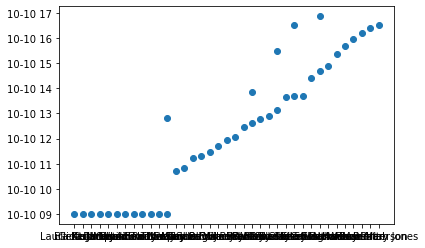

In [47]:
plt.scatter(sta['Name'], sta['Start'])

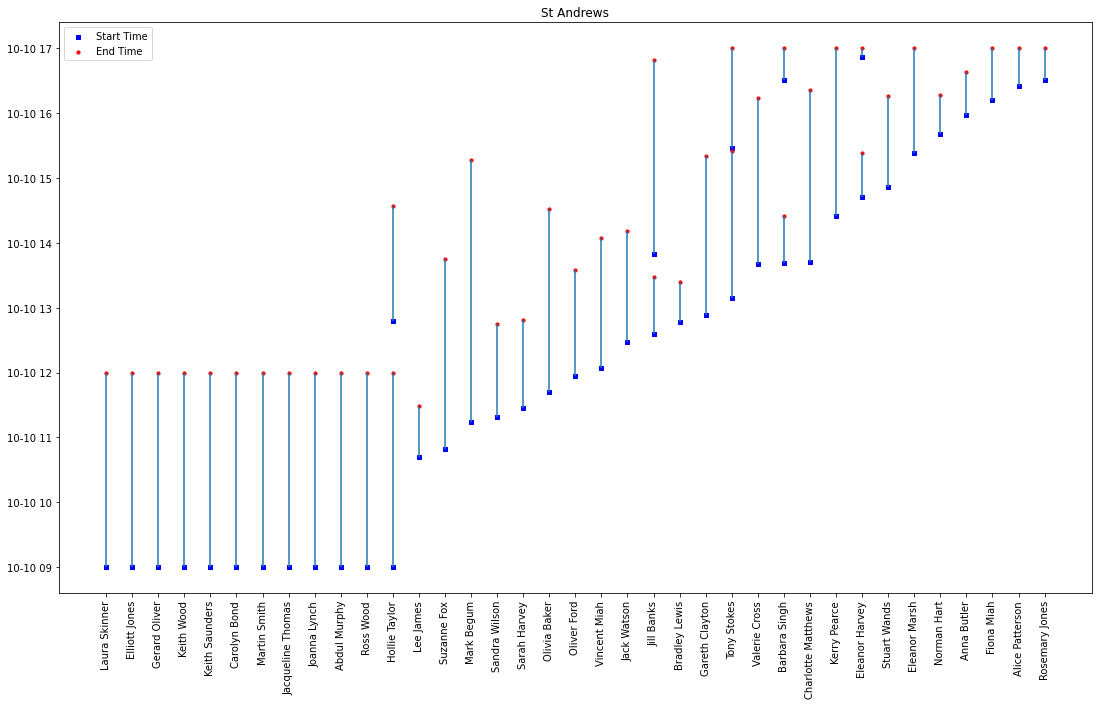

In [58]:
fig  = plt.figure()
fig.set_size_inches(18.5, 10.5)



    
ax1 = fig.add_subplot(111)
ax1.scatter(sta['Name'], sta['Start'], s=10, c='b', marker="s", label='Start Time')
ax1.scatter(sta['Name'],sta['End'], s=10, c='r', marker="o", label='End Time')
ax1.vlines(sta['Name'], sta['Start'], sta['End'])
plt.xticks(rotation = 'vertical')
plt.legend(loc='upper left')
plt.title('St Andrews')
plt.show()

In [66]:
def graphoverlaps(location):
    place = newdataframe[newdataframe['Location']== location]
    fig  = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    ax1.scatter(place['Name'], place['Start'], s=10, c='b', marker="s", label='Start Time')
    ax1.scatter(place['Name'],place['End'], s=10, c='r', marker="o", label='End Time')
    ax1.vlines(place['Name'], place['Start'], place['End'])
    plt.xticks(rotation = 'vertical')
    plt.legend(loc='upper left')
    plt.title(location)
    plt.show()

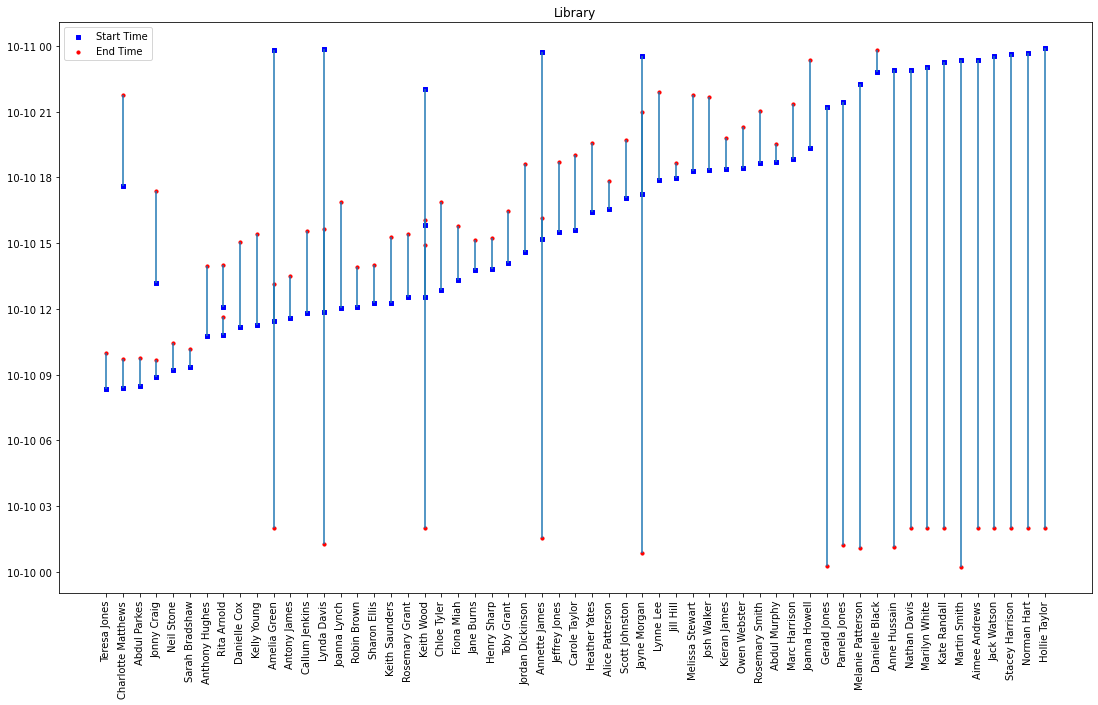

In [67]:
graphoverlaps('Library')

In [63]:
checkforoverlaps('Amelia Green', newdataframe)

0

In [73]:
place = newdataframe[newdataframe['Location']== 'Library']
x = list(place['Name'])
y = list(zip(list(place['Start']), list(place['End'])))


In [81]:
lines = []
for i, j in zip(x, y):
    if j[0] < j[1]:
        pair = [(i, j[0]), (i, j[1])]
        lines.append(pair)
        
linecoll = LineCollection(lines, colors = 'k')
fig, ax = plt.subplots()
ax.plot(x, [i
   for (i, j) in y
], 'rs', markersize = 4)
ax.plot(x, [j
   for (i, j) in y
], 'bo', markersize = 4)
ax.add_collection(linecoll)

ValueError: could not convert string to float: 'Teresa Jones'

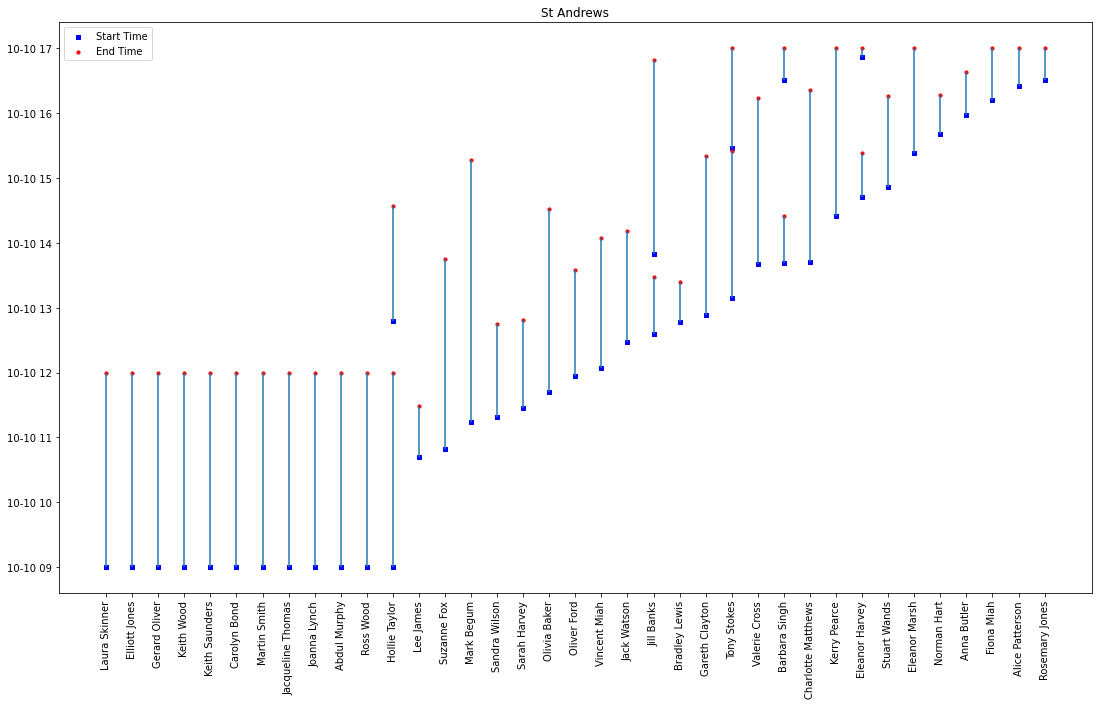

In [77]:
fig  = plt.figure()
fig.set_size_inches(18.5, 10.5)    
ax1 = fig.add_subplot(111)
ax1.scatter(sta['Name'], sta['Start'], s=10, c='b', marker="s", label='Start Time')
ax1.scatter(sta['Name'],sta['End'], s=10, c='r', marker="o", label='End Time')
ax1.vlines(sta['Name'], sta['Start'], sta['End'])
plt.xticks(rotation = 'vertical')
plt.legend(loc='upper left')
plt.title('St Andrews')
plt.show()
